In [1]:
!pip install opencv-python pytesseract sympy matplotlib

In [2]:
!apt-get install tesseract-ocr -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [3]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96

In [4]:
import cv2
import pytesseract
import sympy
import matplotlib.pyplot as plt

In [ ]:
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

In [18]:
img_path = '/content/Screenshot 2025-04-26 190243.png'

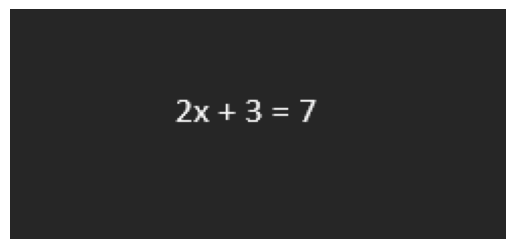

In [14]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')
plt.show()

In [15]:
text = pytesseract.image_to_string(image)
print("Extracted Text:", text)

Extracted Text: eeews



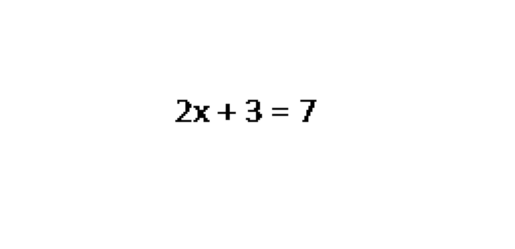

Extracted Text: 2x+3=7



In [19]:
import cv2
import matplotlib.pyplot as plt
import pytesseract

# Load the image
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Invert the image
inverted = cv2.bitwise_not(gray)

# Thresholding
_, thresh = cv2.threshold(inverted, 150, 255, cv2.THRESH_BINARY)

# Optional: Crop around the center if needed to focus on the equation
# (Skipping this for now — we can add it if needed.)

# Show the thresholded image
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

# OCR
custom_config = r'--oem 3 --psm 7'  # psm 7 = single line
text = pytesseract.image_to_string(thresh, config=custom_config)
print("Extracted Text:", text)


In [20]:
from sympy import symbols, Eq, solve

# Text you got from OCR
equation_text = text.strip()

# Clean and prepare text
equation_text = equation_text.replace(' ', '')

# Insert * between number and variable (e.g., 2x -> 2*x)
import re
equation_text = re.sub(r'(\d)([a-zA-Z])', r'\1*\2', equation_text)

print("Processed Equation Text:", equation_text)

# Define variable
x = symbols('x')

# Split into left and right parts
if '=' in equation_text:
    left_side, right_side = equation_text.split('=')
    equation = Eq(eval(left_side), eval(right_side))
else:
    print("No '=' found in the equation text!")

# Solve the equation
try:
    solution = solve(equation, x)
    print("Solution for x:", solution)
except Exception as e:
    print("Error while solving the equation:", e)


Processed Equation Text: 2*x+3=7
Solution for x: [2]


In [26]:
# Load and preprocess image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Invert if necessary
img = cv2.bitwise_not(img)

# Apply Gaussian Blur
img = cv2.GaussianBlur(img, (3,3), 0)

# Adaptive Thresholding (dynamic lighting fix)
thresh = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 11, 2
)

# (Continue with EasyOCR after this)


In [27]:
import easyocr

# Initialize reader
reader = easyocr.Reader(['en'])  # en = English

# Read text from image
results = reader.readtext(thresh, detail=0)  # detail=0 gives only text

# Join results into a single line
text = ''.join(results)

print("Extracted Text:", text)

Extracted Text: 2x+327


In [29]:
# Basic corrections
text = text.replace('Z', '2')
text = text.replace('O', '0')
text = text.replace('l', '1')

# Fix missing '=' if needed
import re
if '=' not in text:
    text = re.sub(r'(\d)(\d)', r'\1=\2', text)

print("Fixed Text:", text)


Fixed Text: 2x+3=27


In [50]:
hand_written_image = '/content/WhatsApp Image 2025-04-26 at 18.50.56_a241cab2.jpg'

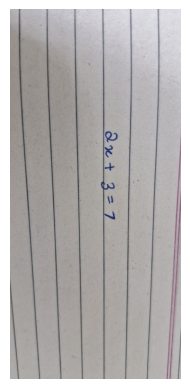

In [32]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(hand_written_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')
plt.show()

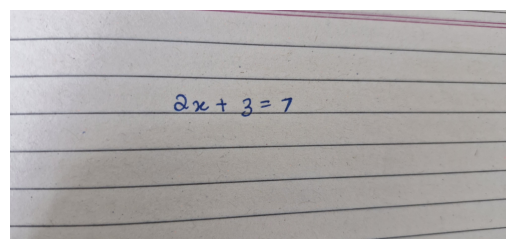

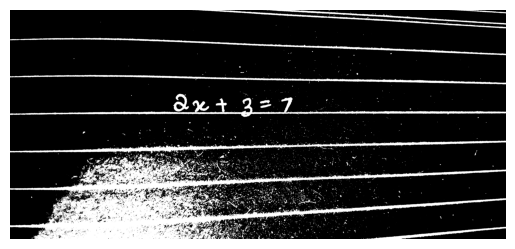

Extracted Text:  



In [48]:
# Rotate the image 90 degrees counter-clockwise
rotated = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Show the rotated image
plt.imshow(rotated)
plt.axis('off')
plt.show()

# Now do preprocessing on rotated image
gray = cv2.cvtColor(rotated, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

# Now OCR
text = pytesseract.image_to_string(thresh)
print("Extracted Text:", text)


In [43]:
# Suppose 'img' is your rotated image
# Convert to grayscale
gray = img  # Already grayscale

# Crop the area where equation is (adjust as needed)
# Example: Crop center region
h, w = gray.shape
crop = gray[h//4:h*3//4, w//4:w*3//4]

# Resize (to make handwriting thicker and clearer)
crop = cv2.resize(crop, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Thresholding to make it black and white
_, thresh = cv2.threshold(crop, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Save or pass 'thresh' to EasyOCR


In [42]:
# Load and preprocess image
img = cv2.imread(hand_written_image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Invert if necessary
img = cv2.bitwise_not(img)

# Apply Gaussian Blur
img = cv2.GaussianBlur(img, (3,3), 0)

# Adaptive Thresholding (dynamic lighting fix)
thresh = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 11, 2
)

# (Continue with EasyOCR after this)


In [44]:
import easyocr

# Initialize reader
reader = easyocr.Reader(['en'])  # en = English

# Read text from image
results = reader.readtext(thresh, detail=0)  # detail=0 gives only text

# Join results into a single line
text = ''.join(results)

print("Extracted Text:", text)

Extracted Text: p4_F


In [45]:
# Basic corrections
text = text.replace('Z', '2')
text = text.replace('O', '0')
text = text.replace('l', '1')

# Fix missing '=' if needed
import re
if '=' not in text:
    text = re.sub(r'(\d)(\d)', r'\1=\2', text)

print("Fixed Text:", text)

Fixed Text: p4_F


In [46]:
!pip install transformers
!pip install sentencepiece
!pip install torch torchvision torchaudio

In [47]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import torch

# Load the processor and model
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-small-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-small-handwritten')

# Set model to evaluation mode
model.eval()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/327 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.21k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.deit.modeling_deit.DeiTModel'> is overwritten by shared encoder config: DeiTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 384,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "model_type": "deit",
  "num_attention_heads": 6,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 384,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 384,
  "d_

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

VisionEncoderDecoderModel(
  (encoder): DeiTModel(
    (embeddings): DeiTEmbeddings(
      (patch_embeddings): DeiTPatchEmbeddings(
        (projection): Conv2d(3, 384, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DeiTEncoder(
      (layer): ModuleList(
        (0-11): 12 x DeiTLayer(
          (attention): DeiTAttention(
            (attention): DeiTSelfAttention(
              (query): Linear(in_features=384, out_features=384, bias=True)
              (key): Linear(in_features=384, out_features=384, bias=True)
              (value): Linear(in_features=384, out_features=384, bias=True)
            )
            (output): DeiTSelfOutput(
              (dense): Linear(in_features=384, out_features=384, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): DeiTIntermediate(
            (dense): Linear(in_features=384, out_features=1536, bias=True)
        

In [58]:
# Load your handwritten image
from PIL import Image
import PIL

# Replace with your image path
image_path = enhanced_image_path  # <-- update your image path here!
image = Image.open(image_path).convert('RGB')  # Always convert to RGB

# Preprocess image
pixel_values = processor(images=image, return_tensors="pt").pixel_values

# Forward pass
with torch.no_grad():
    generated_ids = model.generate(pixel_values)

# Decode generated text
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

print("Predicted Text:", generated_text)


Predicted Text: a b c d e f g h (


In [52]:
# Clean and crop the handwritten image
import cv2
import numpy as np

# Load image
img = cv2.imread(hand_written_image)  # <-- change path
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Threshold to black and white
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours to detect handwritten region
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# If contours found
if contours:
    # Find the biggest contour (assumed to be handwriting)
    cnt = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(cnt)
    cropped = img[y:y+h, x:x+w]

    # Resize bigger
    cropped = cv2.resize(cropped, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    # Save cropped image
    cropped_image_path = '/content/cropped_handwritten.jpg'
    cv2.imwrite(cropped_image_path, cv2.cvtColor(cropped, cv2.COLOR_RGB2BGR))

    print("Cropped and saved:", cropped_image_path)
else:
    print("No handwriting detected.")



Cropped and saved: /content/cropped_handwritten.jpg


In [57]:
# Further enhance image for TrOCR

import cv2
import numpy as np

# Load the cropped image
img = cv2.imread('/content/cropped_handwritten.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Enlarge a little more
img = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)

# Apply slight Gaussian Blur (optional)
img = cv2.GaussianBlur(img, (3, 3), 0)

# Threshold again
_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Morphology to make lines thicker
kernel = np.ones((2,2), np.uint8)
img = cv2.dilate(img, kernel, iterations=1)

# Save enhanced image
enhanced_image_path = '/content/enhanced_handwritten.jpg'
cv2.imwrite(enhanced_image_path, img)

print("Enhanced and saved:", enhanced_image_path)


Enhanced and saved: /content/enhanced_handwritten.jpg


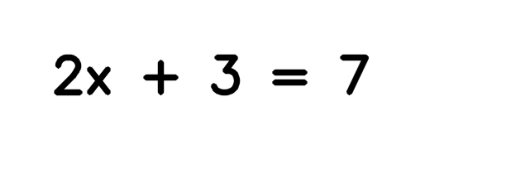

Extracted Text: 2x+35=/7



In [5]:
import numpy as np
import cv2

# Create blank white image
blank_image = np.ones((200, 600), dtype=np.uint8) * 255

# Put simple equation text
cv2.putText(blank_image, '2x + 3 = 7', (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (0), 5, cv2.LINE_AA)

plt.imshow(blank_image, cmap='gray')
plt.axis('off')
plt.show()

# Now OCR
text = pytesseract.image_to_string(blank_image)
print("Extracted Text:", text)


In [7]:
img_path ="/content/WhatsApp Image 2025-04-26 at 18.50.56_a241cab2.jpg"

In [10]:
# math_solver_tesseract.py
import cv2
import pytesseract
from sympy import Eq, symbols, solve

# Load image
image_path = '/content/WhatsApp Image 2025-04-26 at 18.50.56_a241cab2.jpg'
img = cv2.imread(image_path)
# img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thresholding for better OCR
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Dilation to bold characters
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
thresh = cv2.dilate(thresh, kernel, iterations=1)

# OCR
custom_config = r'--oem 3 --psm 7'
extracted = pytesseract.image_to_string(thresh, config=custom_config)
print("Extracted Text:", extracted)

# Preprocessing
cleaned = extracted.replace("x", "*x") if 'x' in extracted and '*' not in extracted else extracted
cleaned = cleaned.replace("=", "=").replace(" ", "")

# SymPy solve
x = symbols('x')
try:
    lhs, rhs = cleaned.split('=')
    equation = Eq(eval(lhs), eval(rhs))
    solution = solve(equation, x)
    print("Solution for x:", solution)
except Exception as e:
    print("Error while parsing:", e)


# math_solver_easyocr.py
import cv2
import easyocr
from sympy import Eq, symbols, solve

# Load image
image_path = 'input.jpg'
img = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# OCR with EasyOCR
reader = easyocr.Reader(['en'], gpu=False)
results = reader.readtext(thresh)
extracted = ' '.join([res[1] for res in results])
print("Extracted Text:", extracted)

# Preprocessing
cleaned = extracted.replace("x", "*x") if 'x' in extracted and '*' not in extracted else extracted
cleaned = cleaned.replace("=", "=").replace(" ", "")

# SymPy solve
x = symbols('x')
try:
    lhs, rhs = cleaned.split('=')
    equation = Eq(eval(lhs), eval(rhs))
    solution = solve(equation, x)
    print("Solution for x:", solution)
except Exception as e:
    print("Error while parsing:", e)


# math_solver_trocr.py
from PIL import Image
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from sympy import symbols, Eq, solve

image_path = 'input.jpg'
image = Image.open(image_path).convert('RGB')

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

pixel_values = processor(images=image, return_tensors="pt").pixel_values

with torch.no_grad():
    generated_ids = model.generate(pixel_values)

text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print("Predicted Text:", text)

# Preprocess and solve
x = symbols('x')
try:
    cleaned = text.replace("x", "*x") if 'x' in text and '*' not in text else text
    cleaned = cleaned.replace("=", "=").replace(" ", "")
    lhs, rhs = cleaned.split('=')
    equation = Eq(eval(lhs), eval(rhs))
    solution = solve(equation, x)
    print("Solution for x:", solution)
except Exception as e:
    print("Error while parsing:", e)


# math_solver_mathpix.py
import base64
import requests
from sympy import Eq, symbols, solve

image_path = 'input.jpg'  # Replace with your image path

with open(image_path, "rb") as f:
    img_base64 = base64.b64encode(f.read()).decode()

r = requests.post(
    url="https://api.mathpix.com/v3/text",
    headers={
        "app_id": "your_app_id",
        "app_key": "your_app_key",
        "Content-type": "application/json"
    },
    json={
        "src": f"data:image/jpg;base64,{img_base64}",
        "formats": ["text", "data"],
        "math_inline_delimiters": ["$", "$"],
        "rm_spaces": True
    }
)

text = r.json().get("text", "")
print("MathPix Output:", text)

# Preprocess and solve
x = symbols('x')
try:
    cleaned = text.replace("x", "*x") if 'x' in text and '*' not in text else text
    cleaned = cleaned.replace("=", "=").replace(" ", "")
    lhs, rhs = cleaned.split('=')
    equation = Eq(eval(lhs), eval(rhs))
    solution = solve(equation, x)
    print("Solution for x:", solution)
except Exception as e:
    print("Error while parsing:", e)


Extracted Text: =

Error while parsing: invalid syntax (<string>, line 0)


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
